In [111]:
from functions import *
from random import sample
import json
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import operator
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import re
from nltk.tokenize import sent_tokenize
import spacy
import networkx as nx
from nltk.corpus import stopwords


spacy_d = {"it":"it_core_news_sm",
           "es":"es_core_news_sm",
           "en":"en_core_web_sm"}

In [2]:
base_path = "/media/ruben/Data Drive/react-data/protest/{}".format("carlo-batch-selection")
#base_path = "D:/react-data/protest/{}".format("carlo-batch-selection")

In [74]:
data = pd.read_csv(open('/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/data-full.csv'),engine='c')

In [83]:
d = dict()

for language in ["it"]:
    print(language)
    nlp = spacy.load(spacy_d[language])
    text_data = [" ".join(str(x).split('||')).split(' ') for x in list(data[data['language'] == language]['sentences'])]
    carlo_indices = [(num,[c for c,i in enumerate(x) if i == "carlo"]) for num,x in enumerate(text_data) if len([c for c,i in enumerate(x) if i == "carlo"]) > 0]
    
    results = []
    for t in tqdm([x[0] for x in carlo_indices]):
        text = " ".join(text_data[t])
        text = text.replace('carlo giuliani','carlo_giuliani')
        doc = nlp(text)
        docs = [(str(x.text),[str(child) for child in x.children]) for x in doc]
        [results.append(x) for x in docs]
    d.update({language:results})

it



 94%|█████████▍| 646/689 [01:48<00:04,  9.14it/s]


100%|██████████| 689/689 [01:53<00:00,  6.09it/s]


In [96]:
def FindTargetWords(word):
    l = [x[1] for x in d['it'] if x[0] == word]
    l = [item for sublist in l for item in sublist if len(str(item)) > 2]
    return list(set(l))

In [98]:
totselword = []

carlo_targets = FindTargetWords("carlo_giuliani")
totselword += carlo_targets

next_targets = [FindTargetWords(x) for x in carlo_targets]
totselword += next_targets


In [118]:
st = []

for head,children in d['it']:
    if head in totselword and head not in list(stopwords.words('italian')):
        for c in children:
            if len(str(c)) > 3:
                st.append([str(head),str(c),1])

In [119]:
st = pd.DataFrame(st,columns=['s','t','w']).groupby(['s','t']).sum().reset_index()
st = st[st['w'] > 5]

In [120]:
st.to_csv('network-dependencies-test.csv',index=False)

/home/ruben/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


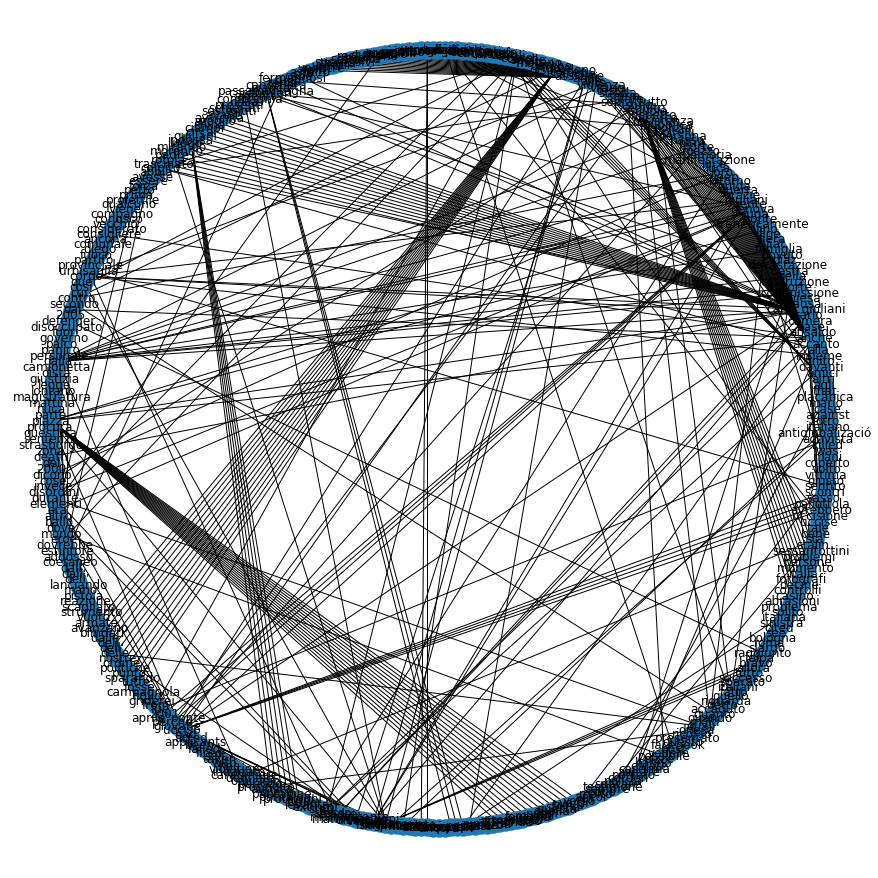

In [102]:
plt.figure(3,figsize=(12,12)) 
G = nx.from_pandas_edgelist(st, source="s", target="t")
nx.draw(G, with_labels = True,pos=nx.circular_layout(G))
plt.show()

In [52]:
st

,s,t,w
0,17.27,",",9
1,17.27,20,3
2,17.27,2001,3
3,17.27,carlo_giuliani,3
4,17.27,le,3
...,...,...,...
2825,του,ιούλιο,2
2826,του,τον,2
2827,του,του,2
2828,’,carlo_giuliani,3
